<a href="https://colab.research.google.com/github/stuti0123/hate-speech-detection/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages
!pip install streamlit -q
!pip install nltk -q

# Imports
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [ ]:
df = pd.read_csv("labeled_data.csv")
df = df[['tweet', 'class']]     # Keeping only tweet and label columns
df['class'] = df['class'].astype(int)
df.head()


,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   class   24783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower().split()
    text = [w for w in text if w not in stop_words]
    return " ".join(text)

df['cleaned'] = df['tweet'].apply(clean_text)
df[['cleaned', 'class']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned,class
0,rt mayasolovely woman complain cleaning house ...,2
1,rt mleew boy dats cold tyga dwn bad cuffin dat...,1
2,rt urkindofbrand dawg rt sbaby life ever fuck ...,1
3,rt c g anderson viva based look like tranny,1
4,rt shenikaroberts shit hear might true might f...,1


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=200, multi_class='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Hate", "Offensive", "Neither"]))


Accuracy: 0.9070002017349204

Confusion Matrix:
 [[  61  199   26]
 [  54 3691   93]
 [   5   84  744]]

Classification Report:
               precision    recall  f1-score   support

        Hate       0.51      0.21      0.30       286
   Offensive       0.93      0.96      0.94      3838
     Neither       0.86      0.89      0.88       833

    accuracy                           0.91      4957
   macro avg       0.77      0.69      0.71      4957
weighted avg       0.89      0.91      0.90      4957



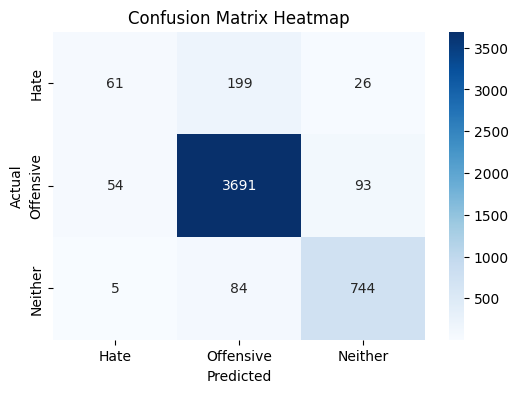

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Hate", "Offensive", "Neither"], yticklabels=["Hate", "Offensive", "Neither"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


Improving accuracy by TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['cleaned'])

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

model2 = LogisticRegression(max_iter=300)
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

print("TF-IDF Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nClassification Report:\n", classification_report(y_test2, y_pred2, target_names=["Hate", "Offensive", "Neither"]))


TF-IDF Accuracy: 0.9007464192051644

Classification Report:
               precision    recall  f1-score   support

        Hate       0.73      0.12      0.20       286
   Offensive       0.91      0.98      0.94      3838
     Neither       0.87      0.82      0.84       833

    accuracy                           0.90      4957
   macro avg       0.84      0.64      0.66      4957
weighted avg       0.89      0.90      0.88      4957



In [ ]:
print("CountVectorizer Accuracy:", accuracy_score(y_test, y_pred))
print("TF-IDF Accuracy:", accuracy_score(y_test2, y_pred2))


CountVectorizer Accuracy: 0.9070002017349204
TF-IDF Accuracy: 0.9007464192051644


/tmp/ipython-input-3974132109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


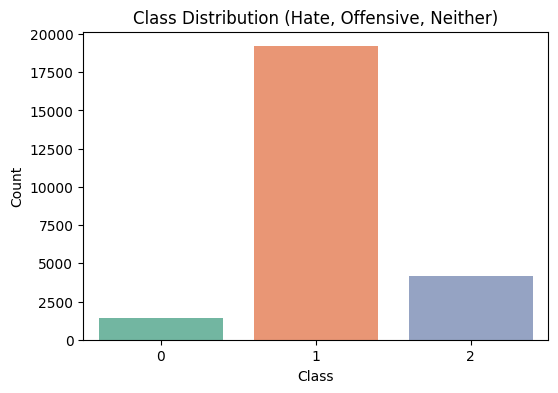

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Class Distribution (Hate, Offensive, Neither)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


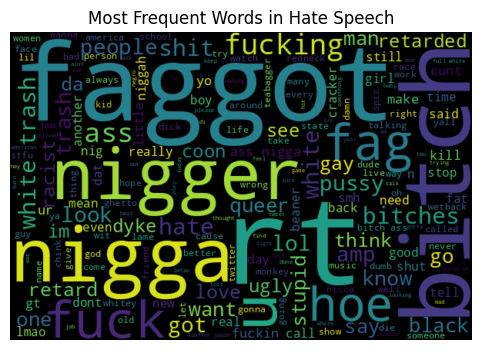

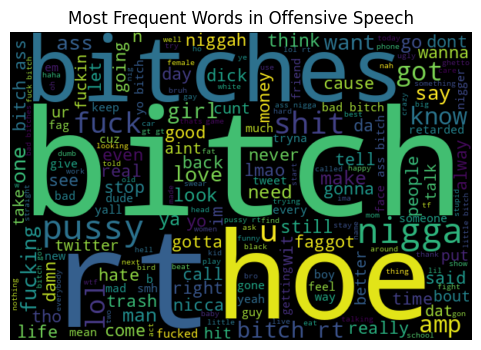

In [ ]:
from wordcloud import WordCloud

# WordCloud for Hate speech
hate_text = " ".join(df[df['class'] == 0]['cleaned'])
wc_hate = WordCloud(width=600, height=400, background_color="black").generate(hate_text)

plt.figure(figsize=(6,4))
plt.imshow(wc_hate, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Hate Speech")
plt.show()

# WordCloud for Offensive
off_text = " ".join(df[df['class'] == 1]['cleaned'])
wc_off = WordCloud(width=600, height=400, background_color="black").generate(off_text)

plt.figure(figsize=(6,4))
plt.imshow(wc_off, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Offensive Speech")
plt.show()


In [ ]:
pickle.dump(model, open("multi_hate_model.pkl", "wb"))
pickle.dump(vectorizer, open("multi_vectorizer.pkl", "wb"))


In [ ]:
%%writefile app.py
import streamlit as st
import pickle

model = pickle.load(open("multi_hate_model.pkl", "rb"))
vectorizer = pickle.load(open("multi_vectorizer.pkl", "rb"))

st.title("🚨 Multi-class Hate/Offensive Language Detector")
text = st.text_area("Enter text to classify:")

if st.button("Classify"):
    if text.strip():
        cleaned = text.lower()
        transformed = vectorizer.transform([cleaned])
        pred = model.predict(transformed)[0]
        label_map = {0: "Hate Speech", 1: "Offensive Language", 2: "Neither"}
        st.subheader(f"Prediction: {label_map[pred]}")
    else:
        st.warning("Please enter some text.")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.228.211:8501

⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://full-roses-laugh.loca.lt
